In [5]:
# WeatherPy



## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [33]:
### Generate the Cities List by Using the `citipy` Library

In [34]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


In [35]:
cities

['bethel',
 'ponta delgada',
 'puksoozero',
 'tallahassee',
 'punta arenas',
 'hamilton',
 'kazalinsk',
 'luderitz',
 'porto santo',
 'vaini',
 'belushya guba',
 'aklavik',
 'qaanaaq',
 'coihaique',
 'ormara',
 'rikitea',
 'takaka',
 'lasa',
 'new norfolk',
 'east london',
 'carutapera',
 'ushuaia',
 'honiara',
 'kavieng',
 'mar del plata',
 'hervey bay',
 'severo-kurilsk',
 'busselton',
 'tuatapere',
 'puerto ayora',
 'arraial do cabo',
 'bredasdorp',
 'bandarbeyla',
 'manado',
 'hasaki',
 'karauzyak',
 'biak',
 'jamestown',
 'kathmandu',
 'bereda',
 'columbus',
 'mataura',
 'taolanaro',
 'tiksi',
 'lillooet',
 'sur',
 'plouzane',
 'hithadhoo',
 'meadow lake',
 'port elizabeth',
 'bluff',
 'broken hill',
 'tura',
 'barrow',
 'nador',
 'laguna',
 'selikhino',
 'yumen',
 'faanui',
 'hay river',
 'mahebourg',
 'ponce',
 'kahului',
 'illoqqortoormiut',
 'albany',
 'bambous virieux',
 'georgetown',
 'saint george',
 'victoria',
 'barentsburg',
 'nikolskoye',
 'yakeshi',
 'nanortalik',
 'he

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [36]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + "metric"
    
    
    #city_url = f"{url}appid={weather_api_key}&q={city}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()
        
  # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']
    
        #city_lat = cities_pd.loc[index, "lat"] = weather_json["coord"]["lat"]
        #city_lng = cities_pd.loc[index, "lon"] = weather_json["coord"]["lon"]
        #city_max_temp = cities_pd.loc[index, "temp_max"] = weather_json["main"]["temp_max"]
        #city_humidity = cities_pd.loc[index, "humidity"] = weather_json["main"]["humidity"]
        #city_clouds = cities_pd.loc[index, "all"] = weather_json["clouds"]["all"]
        #city_wind = cities_pd.loc[index, "speed"] = weather_json["wind"]["speed"]
        #city_country = cities_pd.loc[index, "country"] = weather_json["sys"]["country"]
        #city_date = cities_pd.loc[index, "dt"] = weather_json["dt"]

           
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")      

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | ponta delgada
Processing Record 3 of Set 1 | puksoozero
Processing Record 4 of Set 1 | tallahassee
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | hamilton
Processing Record 7 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 8 of Set 1 | luderitz
Processing Record 9 of Set 1 | porto santo
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | aklavik
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | coihaique
Processing Record 15 of Set 1 | ormara
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | takaka
Processing Record 18 of Set 1 | lasa
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | carutapera
Processing Recor

Processing Record 33 of Set 4 | padang
Processing Record 34 of Set 4 | saskylakh
Processing Record 35 of Set 4 | hualmay
Processing Record 36 of Set 4 | san juan del sur
Processing Record 37 of Set 4 | novokizhinginsk
Processing Record 38 of Set 4 | bambanglipuro
Processing Record 39 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 40 of Set 4 | tashtyp
Processing Record 41 of Set 4 | pilar
Processing Record 42 of Set 4 | te anau
Processing Record 43 of Set 4 | kundiawa
Processing Record 44 of Set 4 | karratha
Processing Record 45 of Set 4 | anderson
Processing Record 46 of Set 4 | usinsk
Processing Record 47 of Set 4 | asau
Processing Record 48 of Set 4 | cherskiy
Processing Record 49 of Set 4 | mildura
Processing Record 0 of Set 5 | san rafael
Processing Record 1 of Set 5 | turayf
Processing Record 2 of Set 5 | wegrow
Processing Record 3 of Set 5 | mashhad
Processing Record 4 of Set 5 | amderma
City not found. Skipping...
Processing Record 5 of Set 5 | ulladulla
Pro

Processing Record 23 of Set 8 | sedniv
Processing Record 24 of Set 8 | tawkar
City not found. Skipping...
Processing Record 25 of Set 8 | haines junction
Processing Record 26 of Set 8 | ilulissat
Processing Record 27 of Set 8 | alexandria
Processing Record 28 of Set 8 | lompoc
Processing Record 29 of Set 8 | taoudenni
Processing Record 30 of Set 8 | nyurba
Processing Record 31 of Set 8 | laiagam
City not found. Skipping...
Processing Record 32 of Set 8 | aloleng
Processing Record 33 of Set 8 | qasigiannguit
Processing Record 34 of Set 8 | guanica
Processing Record 35 of Set 8 | chandausi
Processing Record 36 of Set 8 | pacifica
Processing Record 37 of Set 8 | waipawa
Processing Record 38 of Set 8 | coahuayana
Processing Record 39 of Set 8 | linchuan
City not found. Skipping...
Processing Record 40 of Set 8 | kamaishi
Processing Record 41 of Set 8 | utiroa
City not found. Skipping...
Processing Record 42 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 43 of Set 8 | hobyo
Processi

Processing Record 10 of Set 12 | provideniya
Processing Record 11 of Set 12 | anamur
Processing Record 12 of Set 12 | maarianhamina
Processing Record 13 of Set 12 | greenville
Processing Record 14 of Set 12 | pioner
Processing Record 15 of Set 12 | vila franca do campo
Processing Record 16 of Set 12 | kipini
Processing Record 17 of Set 12 | alotau
City not found. Skipping...
Processing Record 18 of Set 12 | nyon
Processing Record 19 of Set 12 | gorom-gorom
Processing Record 20 of Set 12 | aflu
City not found. Skipping...
Processing Record 21 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 22 of Set 12 | xuddur
Processing Record 23 of Set 12 | cayenne
Processing Record 24 of Set 12 | gat
Processing Record 25 of Set 12 | zatoka
Processing Record 26 of Set 12 | buala
Processing Record 27 of Set 12 | nouadhibou
Processing Record 28 of Set 12 | dingzhou
Processing Record 29 of Set 12 | yola
Processing Record 30 of Set 12 | santa isabel do rio negro
Processing Recor

In [11]:
weather_json

{'coord': {'lon': 104.4556, 'lat': 52.5861},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': -16.79,
  'feels_like': -16.79,
  'temp_min': -16.79,
  'temp_max': -16.79,
  'pressure': 1021,
  'humidity': 99,
  'sea_level': 1021,
  'grnd_level': 959},
 'visibility': 2830,
 'wind': {'speed': 0.04, 'deg': 108, 'gust': 0.21},
 'clouds': {'all': 99},
 'dt': 1675988465,
 'sys': {'type': 1,
  'id': 8891,
  'country': 'RU',
  'sunrise': 1675988986,
  'sunset': 1676023389},
 'timezone': 28800,
 'id': 2018207,
 'name': 'Oyëk',
 'cod': 200}

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


#city_data_df



# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cockburn town,21.4612,-71.1419,25.02,77,0,10.32,TC,1675987894
1,dingle,10.9995,122.6711,25.34,86,77,4.37,PH,1675988098
2,nioro,13.3500,-15.7500,23.55,44,15,3.33,GM,1675988098
3,redmond,47.6740,-122.1215,15.00,55,67,3.13,US,1675988027
4,sangueya,10.7000,-14.3667,21.83,72,6,1.44,GN,1675988099


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("../output/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("../output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cockburn town,21.4612,-71.1419,25.02,77,0,10.32,TC,1675987894
1,dingle,10.9995,122.6711,25.34,86,77,4.37,PH,1675988098
2,nioro,13.3500,-15.7500,23.55,44,15,3.33,GM,1675988098
3,redmond,47.6740,-122.1215,15.00,55,67,3.13,US,1675988027
4,sangueya,10.7000,-14.3667,21.83,72,6,1.44,GN,1675988099


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

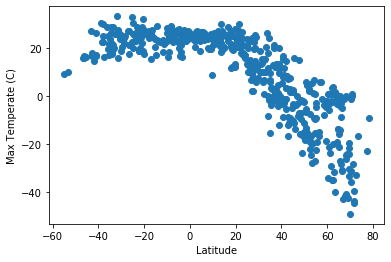

In [16]:
# Build scatter plot for latitude vs. temperature
#x_values = city_data_df['Lat']
#y_values = city_data_df['Max Temp']

# Incorporate the other graph properties

plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperate (C)')


# Save the figure
plt.savefig("../output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

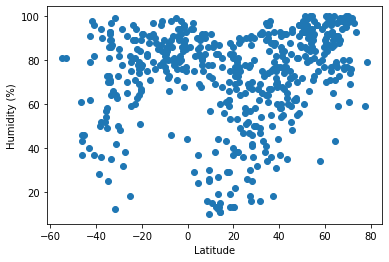

In [17]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties

plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


# Save the figure
plt.savefig("../output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

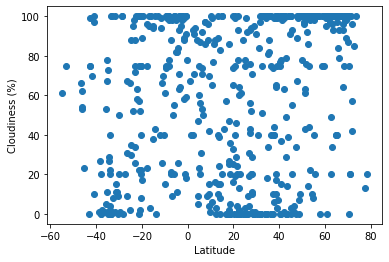

In [18]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties

plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


# Save the figure
plt.savefig("../output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

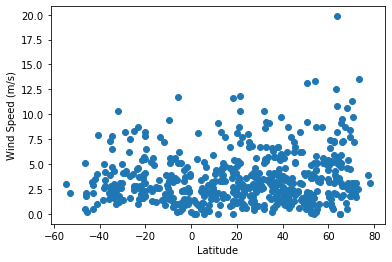

In [20]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties

plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("../output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE


In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cockburn town,21.4612,-71.1419,25.02,77,0,10.32,TC,1675987894
1,dingle,10.9995,122.6711,25.34,86,77,4.37,PH,1675988098
2,nioro,13.3500,-15.7500,23.55,44,15,3.33,GM,1675988098
3,redmond,47.6740,-122.1215,15.00,55,67,3.13,US,1675988027
4,sangueya,10.7000,-14.3667,21.83,72,6,1.44,GN,1675988099


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"]<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,soyo,-6.1349,12.3689,26.12,81,55,3.42,AO,1675988099
7,gamba,-2.6500,10.0000,26.10,86,98,2.30,GA,1675988100
8,mataura,-46.1927,168.8643,15.82,37,62,1.75,NZ,1675988101
9,carnarvon,-24.8667,113.6333,25.79,75,88,8.34,AU,1675988101
11,hobart,-42.8794,147.3294,17.92,91,75,2.06,AU,1675987839


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7195664380420198


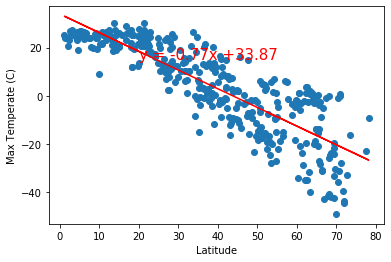

In [24]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])

# Get regression values
regress_values = northern_hemi_df['Lat'] * slope + intercept


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'],regress_values, color='r')
plt.xlabel('Latitude')
plt.ylabel('Max Temperate (C)')



# Label plot and annotate the line equation
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()




The r-value is: 0.148640376523576


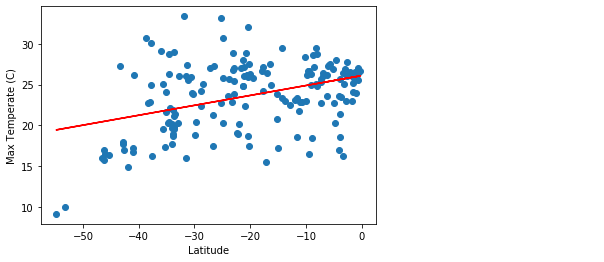

In [25]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

# Get regression values
regress_values = southern_hemi_df['Lat'] * slope + intercept


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'],regress_values, color='r')
plt.xlabel('Latitude')
plt.ylabel('Max Temperate (C)')



# Label plot and annotate the line equation
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.19322960295598343


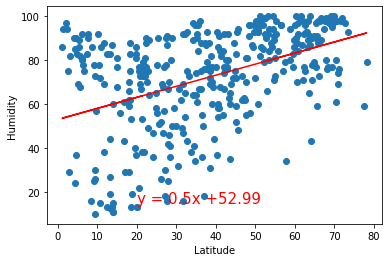

In [26]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

# Get regression values
regress_values = northern_hemi_df['Lat'] * slope + intercept


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'],regress_values, color='r')
plt.xlabel('Latitude')
plt.ylabel('Humidity')



# Label plot and annotate the line equation
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()



The r-value is: 0.15874068800822516


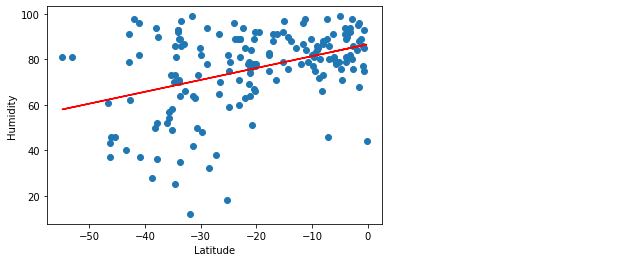

In [27]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

# Get regression values
regress_values = southern_hemi_df['Lat'] * slope + intercept


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'],regress_values, color='r')
plt.xlabel('Latitude')
plt.ylabel('Humidity')



# Label plot and annotate the line equation
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.12341405449357416


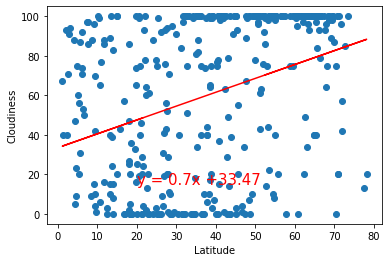

In [28]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])

# Get regression values
regress_values = northern_hemi_df['Lat'] * slope + intercept


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'],regress_values, color='r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')



# Label plot and annotate the line equation
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.15472531235202056


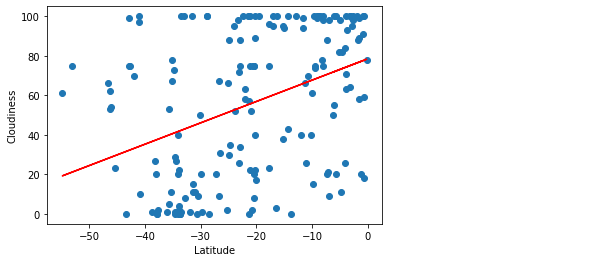

In [29]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

# Get regression values
regress_values = southern_hemi_df['Lat'] * slope + intercept


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'],regress_values, color='r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')



# Label plot and annotate the line equation
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03075651619406905


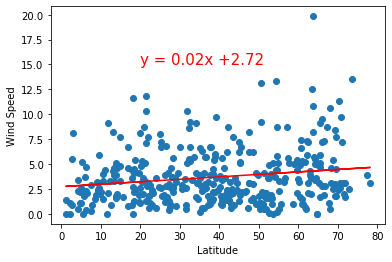

In [30]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])

# Get regression values
regress_values = northern_hemi_df['Lat'] * slope + intercept


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'],regress_values, color='r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')



# Label plot and annotate the line equation
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.003530952668541526


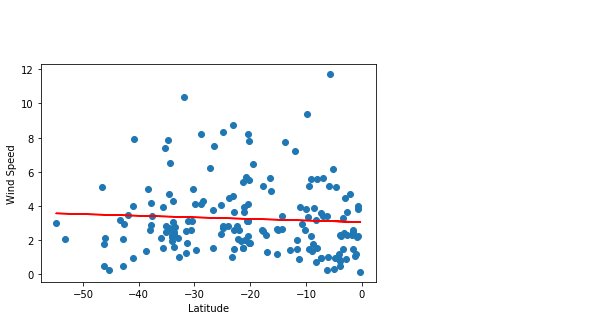

In [31]:
# Southern Hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])

# Get regression values
regress_values = southern_hemi_df['Lat'] * slope + intercept


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'],regress_values, color='r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')



# Label plot and annotate the line equation
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
**Discussion about the linear relationship:** YOUR RESPONSE HERE